In [3]:
%%capture
!python -m pip install abraia

import os
if not os.getenv('ABRAIA_ID') and not os.getenv('ABRAIA_KEY'):
    #@markdown <a href="https://abraia.me/console/gallery" target="_blank">Upload and manage your images</a>
    abraia_id = ''  #@param {type: "string"}
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_ID=$abraia_id
    %env ABRAIA_KEY=$abraia_key

from abraia import Abraia

multiple = Abraia()

In [4]:
import os
import tempfile
import numpy as np
from abraia.torch import Dataset, visualize_data, create_model, train_model, visualize_model, save_model, save_classes

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

ModuleNotFoundError: No module named 'torch'

In [ ]:
dataset = 'hymenoptera_data'

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: Dataset(os.path.join(dataset), data_transforms[x]) for x in ['train', 'val']}
# image_datasets = {x: Dataset(os.path.join(dataset, x), data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8, shuffle=True, num_workers=4) for x in ['train', 'val']}

visualize_data(dataloaders['train'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class_names = image_datasets['train'].classes
model_conv = create_model(class_names).to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_ft = train_model(model_conv, dataloaders, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


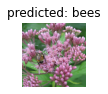

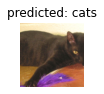

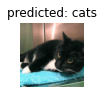

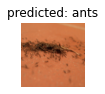

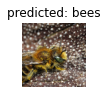

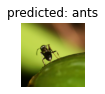

In [ ]:
visualize_model(model_ft, dataloaders)

In [ ]:
save_model(os.path.join(dataset, 'model_ft.pt'), model_ft)
save_classes(os.path.join(dataset, 'model_ft.txt'), class_names)